In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Master_Folder\Data Science Course\Projects\StockMarket\stock_data/SUZLON.NS_2023-01-01_to_2024-11-21.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_27708\1068188315.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


In [3]:
data.head()

,Day,Weekday,Month,Year,Open,High,Low,Close,Adj Close,Adj_Close_Lag_1,...,EMA_50,RSI,EMA_12,EMA_26,MACD,MACD_Signal,SMA_20,Bollinger_Upper,Bollinger_Lower,Upward_Downward_Probability
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-17,17,4,3,2023,7.95,8.15,7.90,8.00,8.00,7.90,...,8.951,40.476,8.207,8.497,-0.290,-0.286,8.318,8.870,7.766,-2.639057
2023-03-20,20,0,3,2023,8.00,8.00,7.70,7.75,7.75,8.00,...,8.904,41.463,8.137,8.442,-0.305,-0.289,8.260,8.796,7.724,-2.639057
2023-03-21,21,1,3,2023,7.85,7.90,7.75,7.80,7.80,7.75,...,8.861,40.000,8.085,8.394,-0.309,-0.293,8.222,8.777,7.667,-2.639057
2023-03-22,22,2,3,2023,7.85,7.95,7.80,7.80,7.80,7.80,...,8.819,33.333,8.041,8.350,-0.309,-0.296,8.192,8.771,7.613,-2.639057
2023-03-23,23,3,3,2023,7.80,7.90,7.70,7.75,7.75,7.80,...,8.777,35.294,7.996,8.306,-0.310,-0.299,8.165,8.774,7.556,-2.639057


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 411 entries, 2023-03-17 to 2024-11-19
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day                          411 non-null    int64  
 1   Weekday                      411 non-null    int64  
 2   Month                        411 non-null    int64  
 3   Year                         411 non-null    int64  
 4   Open                         411 non-null    float64
 5   High                         411 non-null    float64
 6   Low                          411 non-null    float64
 7   Close                        411 non-null    float64
 8   Adj Close                    411 non-null    float64
 9   Adj_Close_Lag_1              411 non-null    float64
 10  Adj_Close_Lag_2              411 non-null    float64
 11  Adj_Close_Lag_3              411 non-null    float64
 12  Volume                       411 non-null    int64  
 13  P

In [5]:
data.describe()

,Day,Weekday,Month,Year,Open,High,Low,Close,Adj Close,Adj_Close_Lag_1,...,EMA_50,RSI,EMA_12,EMA_26,MACD,MACD_Signal,SMA_20,Bollinger_Upper,Bollinger_Lower,Upward_Downward_Probability
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,15.788321,2.009732,6.754258,2023.530414,39.695572,40.457640,38.699440,39.605839,39.605839,39.473674,...,36.041871,58.412431,38.883234,37.855268,1.027966,1.058599,38.343625,42.762908,33.924343,0.441767
std,8.803905,1.408996,3.062830,0.499682,21.721155,22.045295,21.146168,21.552659,21.552659,21.580179,...,20.450166,16.154181,21.532267,21.265070,1.648416,1.513787,21.585002,23.796686,19.563263,1.223880
min,1.000000,0.000000,1.000000,2023.000000,7.100000,7.350000,6.950000,7.050000,7.050000,7.050000,...,8.311000,12.195000,7.698000,8.050000,-4.187000,-3.432000,7.862000,8.285000,6.706000,-2.708050
25%,8.000000,1.000000,4.000000,2023.000000,20.175000,20.675000,19.850000,20.225000,20.225000,20.125000,...,17.001000,47.338000,19.474500,18.638500,0.060500,0.057500,19.115500,20.808000,17.119500,0.236389
50%,16.000000,2.000000,7.000000,2024.000000,39.850000,40.550000,38.700000,39.650000,39.650000,39.600000,...,38.204000,60.900000,39.429000,40.211000,1.154000,1.168000,39.588000,43.522000,35.810000,0.788457
75%,23.000000,3.000000,9.000000,2024.000000,52.550000,53.165000,51.250000,52.810000,52.810000,51.645000,...,45.786000,69.949000,49.994000,47.899500,1.836000,1.797500,48.600500,53.408000,44.025000,1.349927
max,31.000000,4.000000,12.000000,2024.000000,86.000000,86.040000,83.660000,84.700000,84.700000,84.700000,...,74.733000,90.955000,81.669000,79.364000,6.316000,5.729000,80.496000,87.702000,74.256000,2.639057


In [6]:
past_7_days = data[data.index >= (data.index.max() - pd.Timedelta(days=7))]
print(past_7_days)

            Day  Weekday  Month  Year   Open   High    Low  Close  Adj Close  \
Date                                                                           
2024-11-12   12        1     11  2024  62.16  62.87  59.10  59.39      59.39   
2024-11-13   13        2     11  2024  58.00  59.28  53.45  54.03      54.03   
2024-11-14   14        3     11  2024  54.03  56.73  53.65  56.73      56.73   
2024-11-18   18        0     11  2024  59.45  59.56  56.80  59.26      59.26   
2024-11-19   19        1     11  2024  60.50  62.22  59.42  62.22      62.22   

            Adj_Close_Lag_1  ...  EMA_50     RSI  EMA_12  EMA_26   MACD  \
Date                         ...                                          
2024-11-12            62.16  ...  70.614  31.215  65.683  68.897 -3.214   
2024-11-13            59.39  ...  69.963  25.000  63.890  67.796 -3.906   
2024-11-14            54.03  ...  69.444  32.821  62.789  66.976 -4.187   
2024-11-18            56.73  ...  69.045  30.966  62.246  66.405

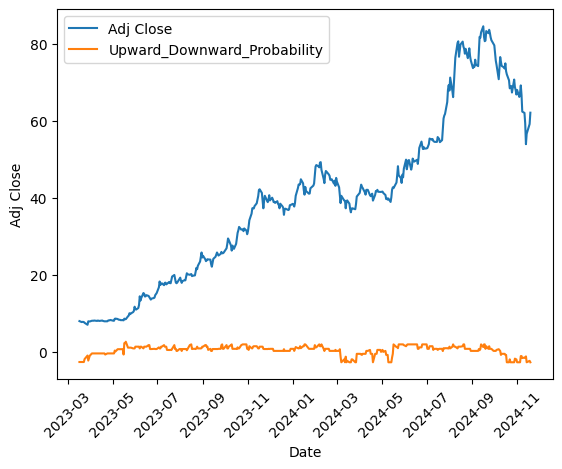

In [7]:
sns.lineplot(data=data, x=data.index, y=data['Adj Close'], label='Adj Close')
sns.lineplot(data=data, x=data.index, y=data['Upward_Downward_Probability'], label='Upward_Downward_Probability')

plt.xticks(rotation=45)
plt.legend()
plt.show()

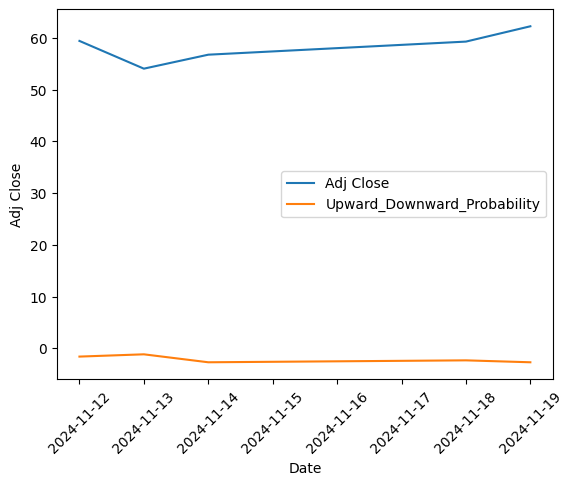

In [8]:
sns.lineplot(data=past_7_days, x=past_7_days.index, y=past_7_days['Adj Close'], label='Adj Close')
sns.lineplot(data=past_7_days, x=past_7_days.index, y=past_7_days['Upward_Downward_Probability'], label='Upward_Downward_Probability')

plt.xticks(rotation=45)
plt.legend()
plt.show()

<Axes: xlabel='Date', ylabel='Volume'>

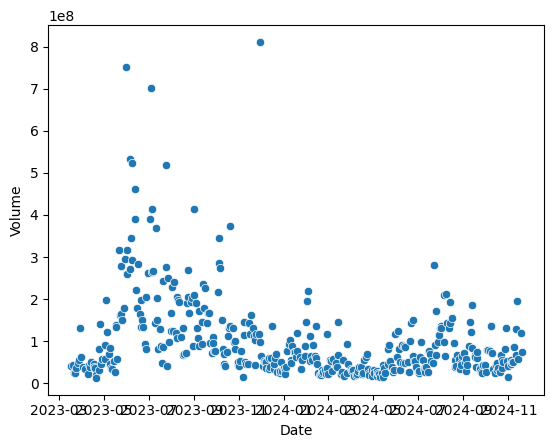

In [9]:
sns.scatterplot(x=data.index, y=data['Volume'])

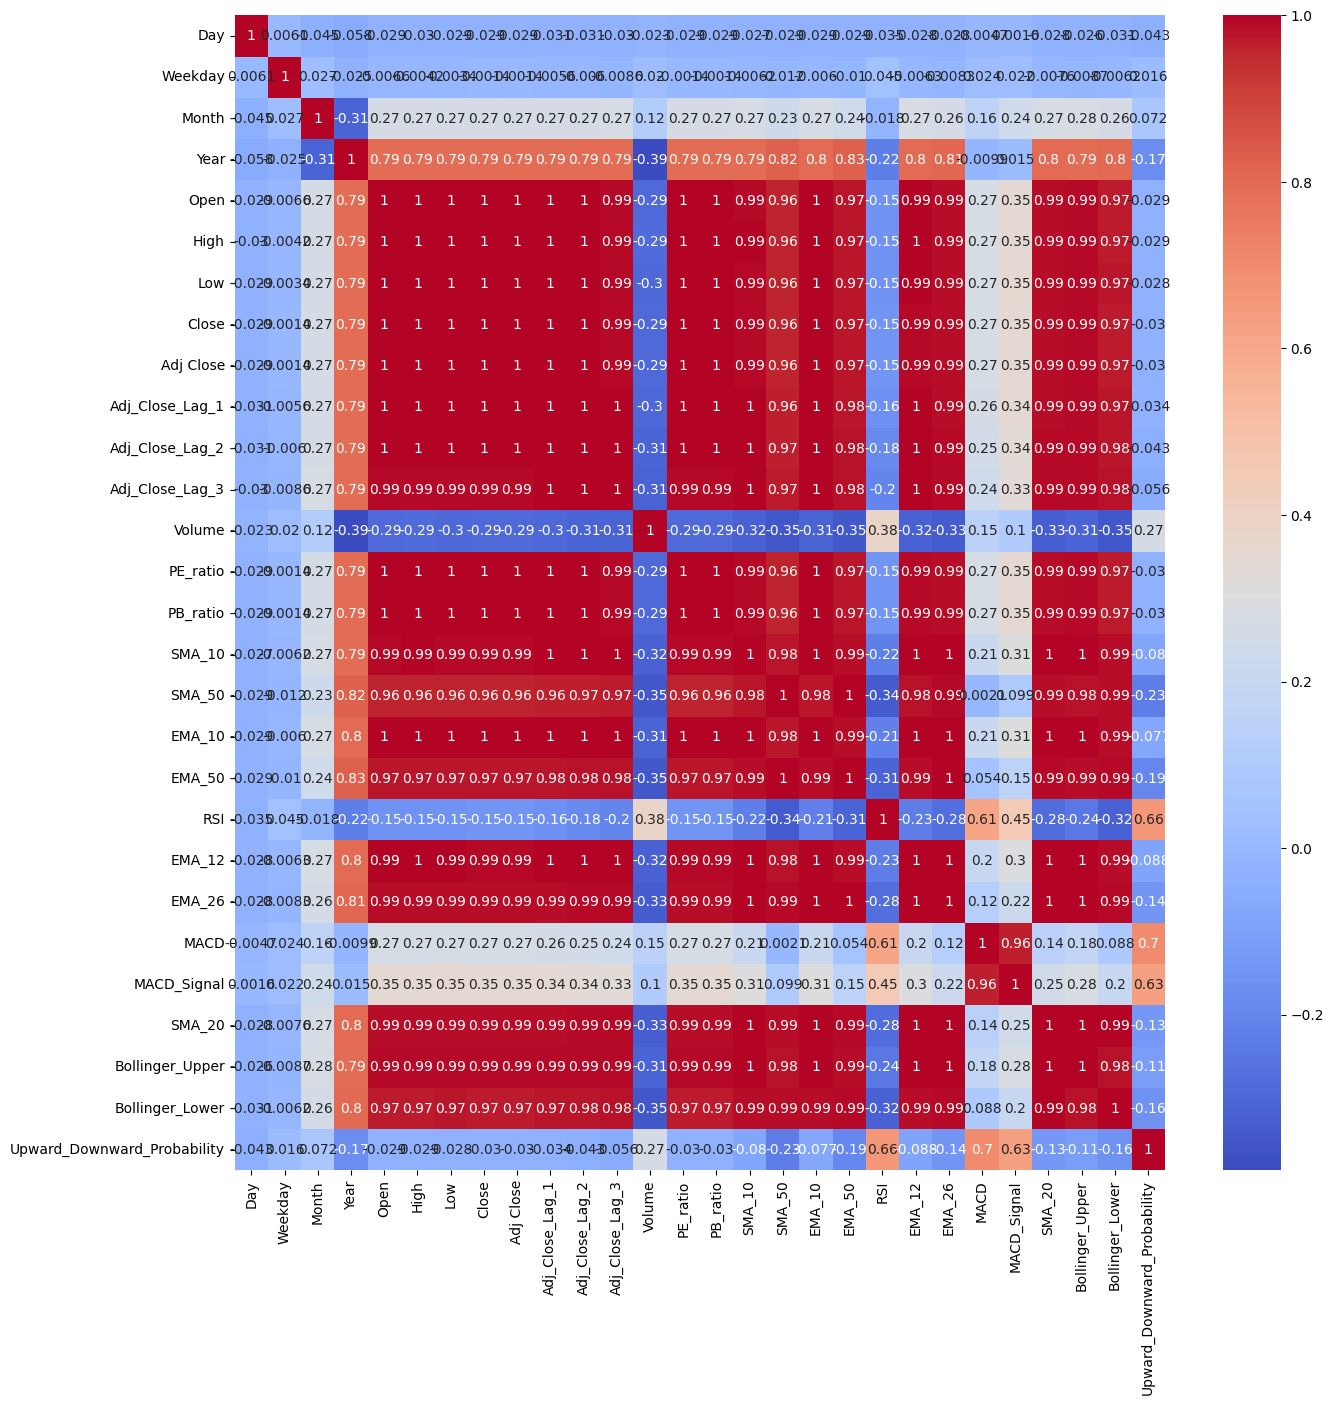

In [10]:
plt.figure(figsize=(15, 15)) 
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()